# 1. Комплексные числа с SymPy

## 1.1. Алгебраические операции над комплексными числами

Мнимой единицей называется число $i$ такое, что $i^2=-1$.

Пусть $x$, $y$ $-$ вещественные числа. Число $z=x+iy$ называется комплексным числом. Число $x$ называется действительной частью комплексного числа, $y$  $-$ мнимой частью.

Обозначим $x = \mathrm{Re} z$, $y = \mathrm{Im} z$. Тогда $z = \mathrm{Re} z + i\mathrm{Im} z$.

Два комплексных числа $z_1=x_1+iy_1$ и $z_2=x_2+iy_2$ равны тогда и только тогда, когда равны их
действительные и мнимые части, т.е. $$x_1=x_2,\quad y_1=y_2.$$

Число $0+i0$ называется нулем и обозначается символом $0$.


Пусть $z_1=x_1+iy_1$, $z_2=x_2+iy_2$. Суммой комплексных чисел $z_1$ и $z_2$ называется
комплексное число
$$z=z_1+z_2=(x_1+x_2)+i(y_1+y_2),$$
а их разностью  $-$  число
$$z=z_1-z_2=(x_1-x_2)+i(y_1-y_2).$$ Произведение комплексных чисел $z_1$ и $z_2$ есть комплексное
число
$$z=z_1z_2=(x_1x_2-y_1y_2)+i(x_1y_2+x_2y_1).$$
Правило  деления комплексных чисел определяется формулой
$$\displaystyle
z=\frac{z_1}{z_2}=\frac{x_1x_2+y_1y_2}{x_2^2+y_2^2}+i\frac{x_2y_1-x_1y_2}{x_2^2+y_2^2}.$$

Число $\overline{z}=x-iy$ называется сопряженным к числу $z=x+iy$. Заметим, что
$$z\overline{z}=(x+iy)(x-iy)=x^2+y^2.$$ Формула деления комплексных чисел получается, если умножить
числитель и знаменатель на число, сопряженное к знаменателю.

**Упражнение 1.** Решить следующую систему двух уравнений с комплексными коэффициентами относительно комплексных неизвестных $z_1$ и $z_2$:
$$\begin{array}{l}
	(3-i)z_1+(4+2i)z_2=2+6i,\\
	(4+2i)z_1-(2+3i)z_2=5+4i.
\end{array}$$

Импортируем из библиотеки sympy метод simplify, предназначенный для упрощения символьных выражений и мнимую единицу. В sympy она обозначается символом $I$.

In [1]:
from sympy import I, simplify

Запишем исходную систему уравнений в следующем виде:
$$
	\begin{array}{c}
	a_{11}z_1+a_{12}z_2=b_1,\\
	a_{21}z_1+a_{22}z_2=b_2.
    \end{array}
$$
Определим коэффициенты левой и правой частей этой системы уравнений.

In [2]:
a11 = 3 - I; a12 = 4 + 2*I; b1 = 2 + 6*I

In [3]:
a21 = 4 + 2*I; a22 = -2 - 3*I; b2 = 5 + 4*I

Систему уравнений решим методом исключения неизвестных. Сначала разделим коэффициенты обеих частей первого уравнения на a11 и посмотрим чему они стали равны.

In [4]:
a11_new = simplify(a11/a11); a11_new

1

In [5]:
a12_new = simplify(a12/a11); a12_new

1 + I

In [6]:
b1_new = simplify(b1/a11); b1_new

2*I

В результате, первое уравнение системы стало выглядеть следующим образом:
$$
z_1 + (1+i)z_2 = 2i.\qquad (1)
$$
Наша ближайшая цель $-$ исключить из второго уравнения системы неизвестную $z_1$. Для этого умножим коэффициенты уравнения (1) на a21 и посмотрим чему они стали равны.

In [7]:
a11_new_new = simplify(a11_new*a21); a11_new_new

4 + 2*I

In [8]:
a12_new_new = simplify(a12_new*a21); a12_new_new

2 + 6*I

In [9]:
b1_new_new = simplify(b1_new*a21); b1_new_new

-4 + 8*I

Запишем первое уравнение системы с этими коэффициентами:
$$
(4+2i)z_1 + (2+6i)z_2 = -4+8i.
$$
Для нас важно, что коэффициенты при неизвестной $z_1$ в первом и втором уравнениях стали равными. Вычтем из второго уравнения системы преобразованное таким образом первое. Посмотрим чему теперь равны коэффициенты второго уравнения.

In [10]:
a21_new = simplify(a21 - a11_new_new); a21_new

0

In [11]:
a22_new = simplify(a22 - a12_new_new); a22_new

-4 - 9*I

In [12]:
b2_new = simplify(b2 - b1_new_new); b2_new

9 - 4*I

Важно, что коэффициент при первой неизвестной стал равным нулю, а само второе уравнение системы теперь выглядит так:
$$
-(4+9i)z_2 = 9-4i.
$$
Решим его и найдем $z_2$.

In [13]:
z2 = simplify(b2_new/a22_new); z2

I

Подставим теперь найденное $z_2=i$ в первое уравнение системы вида (1)
и вычислим $z_1$.

In [14]:
z1 = simplify(b1_new - a12_new*z2); z1

1 + I

Ответ: $z_1 = 1+i$, $z_2 = i$.

**Решим то же упражнение вторым способом.**

**Упражнение 1.** Решить следующую систему двух уравнений с комплексными коэффициентами относительно комплексных неизвестных $z_1$ и $z_2$:
$$\begin{array}{l}
	(3-i)z_1+(4+2i)z_2=2+6i,\\
	(4+2i)z_1-(2+3i)z_2=5+4i.
\end{array}$$

Импортируем из библиотеки sympy методы re и im, предназначенные вычисления вещественных и мнимых частей символьных выражений, и мнимую единицу.

In [15]:
from sympy import I, re, im

Определим вещественные символы x1, x2, y1, y2.

In [16]:
from sympy import symbols
x1, y1, x2, y2 = symbols('x1 y1 x2 y2', real = True)

Определим коэффициенты левой и правой частей исходной системы уравнений.

In [17]:
a11 = 3 - I; a12 = 4 + 2*I; b1 = 2 + 6*I

In [18]:
a21 = 4 + 2*I; a22 = -2 - 3*I; b2 = 5 + 4*I

Определим комплексные символы z1, z2.

In [19]:
z1 = x1 + I*y1

In [20]:
z2 = x2 + I*y2

Вычислим вещественные и мнимые части от левых и правых частей двух уравнений исходной системы.

In [21]:
re(a11*z1 + a12*z2)

3*x1 + 4*x2 + y1 - 2*y2

In [22]:
re(a21*z1 + a22*z2)

4*x1 - 2*x2 - 2*y1 + 3*y2

In [23]:
im(a11*z1 + a12*z2)

-x1 + 2*x2 + 3*y1 + 4*y2

In [24]:
im(a21*z1 + a22*z2)

2*x1 - 3*x2 + 4*y1 - 2*y2

In [25]:
re(b1)

2

In [26]:
re(b2)

5

In [27]:
im(b1)

6

In [28]:
im(b2)

4

Приравняем вещественные и мнимые части левых и правых частей исходной системы уравнений. Получим систему четырех уравнений с вещественными коэффициентами относительно четырех вещественных неизвестных $x_1$, $x_2$, $y_1$, $y_2$:
$$
\begin{array}{l}
	3x_1+4x_2+y_1-2y_2=2,\\
	4x_1-2x_2-2y_1+3y_2=5,\\    
  -x_1+2x_2+3y_1+4y_2=6,\\
  2x_1-3x_2+4y_1-2y_2=4.
\end{array}
$$
Решим эту систему уравнений методом последовательного исключения неизвестных. Для этого из коэффициентов левых частей уравнений системы составим таблицу чисел A. Она называется матрица. Для работы с матрицами в sympy применяется класс Matrix.

In [29]:
from sympy.matrices import Matrix

In [30]:
A = Matrix([
    [ 3, 4, 1,-2],
    [ 4,-2,-2, 3],
    [-1, 2, 3, 4],
    [ 2,-3, 4, -2]
    ])
A

Matrix([
[ 3,  4,  1, -2],
[ 4, -2, -2,  3],
[-1,  2,  3,  4],
[ 2, -3,  4, -2]])

Из коэффициентов правых частей уравнений полученной системы составим матрицу-столбец b.

In [31]:
b = Matrix([
    [2],
    [5],
    [6],
    [4]
    ])
b

Matrix([
[2],
[5],
[6],
[4]])

Решим систему уравнений с матрицей A и столбцом правой части b.

In [32]:
A.solve(b)

Matrix([
[1],
[0],
[1],
[1]])

Запишем вычисленные значения для четырех вещественных неизвестных $x_1=1$, $x_2=0$, $y_1=1$, $y_2=1$ системы. Составим из вещественных и мнимых частей выражения для искомых комплексных переменных. Ответ: $z_1=x_1+iy_1=1+i$, $z_2 = x_2 + iy_2 = i$.

**Упражнение 2.** Решить следующую систему уравнений относительно комплексных чисел $z_1$ и $z_2$:
$$\begin{array}{l}
	(2+i)z_1+(2-i)z_2=6,\\
	(3+2i)z_1+(3-2i)z_2=8.
\end{array}$$

**Ответ**. $z_1=2+i$, $z_2=2-i$.

**Здесь напишите код решения упражнения 2 любым из двух способов, описанных выше.**

In [33]:
from sympy import I, re, im

a_11 = 2 + I
a_12 = 2 - I

a_21 = 3 + 2*I
a_22 = 3 - 2*I

b_1 = 6
b_2 = 8

Определим комплексные числа в символьной форме

In [34]:
x1, y1, x2, y2 = symbols('x1 y1 x2 y2', real = True)

z_1 = x1 + I*y1
z_2 = x2 + I*y2

Вычислим вещественные и мнимые части

In [35]:
print(re(a_11 * z_1 + a_12 * z_2))
print(re(a_21 * z_1 + a_22 * z_2))
print(re(b_1))
print(re(b_2))

print(im(a_11 * z_1 + a_12 * z_2))
print(im(a_21 * z_1 + a_22 * z_2))
print(im(b_1))
print(im(b_2))

2*x1 + 2*x2 - y1 + y2
3*x1 + 3*x2 - 2*y1 + 2*y2
6
8
x1 - x2 + 2*y1 + 2*y2
2*x1 - 2*x2 + 3*y1 + 3*y2
0
0


Приравниваем вещественные и мнимые части
$$
\begin{array}{l}
	2x_1+2x_2-y_1+y_2=6,\\
	3x_1+3x_2-2y_1+2y_2=8,\\    
    x_1-x_2+2y_1+2y_2=0,\\
  2x_1-2x_2+3y_1+3y_2=0.
\end{array}
$$

In [36]:
A = Matrix([
    [2, 2, -1, 1],
    [3, 3, -2, 2],
    [1, -1, 2, 2],
    [2, -2, 3, 3]
])
A

Matrix([
[2,  2, -1, 1],
[3,  3, -2, 2],
[1, -1,  2, 2],
[2, -2,  3, 3]])

In [37]:
b = Matrix([
    [6],
    [8],
    [0],
    [0]
])
b

Matrix([
[6],
[8],
[0],
[0]])

In [38]:
A.solve(b)

Matrix([
[ 2],
[ 2],
[ 1],
[-1]])

**Упражнение 3.**  Найти вещественные числа $x, y, u, v$, являющиеся решениями следующей системы уравнений с комплексными коэффициентами:
$$\begin{array}{l}
	(1+i)x+(1+2i)y+(1+3i)u+(1+4i)v=1+5i,\\
	(3-i)x+(4-2i)y+(1+i)u+4iv=2-i.
\end{array}$$

**Ответ**. $x=-2$, $y=3/2$, $u=2$, $v=-1/2$.


**Здесь напишите код решения упражнения 3.**

In [39]:
x, y, u, v = symbols('x y u v')

print(1 * x + 1 * y + 1 * u + 1 * v)
print(3 * x + 4 * y + 1 * u + 0 * v)
print(1)
print(2)

print(1 * x + 2 * y + 3 * u + 4 * v)
print(-1 * x - 2 * y + 1 * u + 4 * v)
print(5)
print(-1)

u + v + x + y
u + 3*x + 4*y
1
2
3*u + 4*v + x + 2*y
u + 4*v - x - 2*y
5
-1


In [40]:
A = Matrix([
    [1, 1, 1, 1],
    [3, 4, 1, 0],
    [1, 2, 3, 4],
    [-1, -2, 1, 4]
])
A

Matrix([
[ 1,  1, 1, 1],
[ 3,  4, 1, 0],
[ 1,  2, 3, 4],
[-1, -2, 1, 4]])

In [41]:
b = Matrix([
    [1],
    [2],
    [5],
    [-1]
])
b

Matrix([
[ 1],
[ 2],
[ 5],
[-1]])

In [42]:
A.solve(b)

Matrix([
[  -2],
[ 3/2],
[   2],
[-1/2]])

## 1.2. Тригонометрическая форма комплексного числа

Вещественное неотрицательное число $$\rho=|z|=\sqrt{z\overline{z}}=\sqrt{x^2+y^2}$$ называется модулем
комплексного числа ${z}=x+iy$. Здесь $i$ $-$ мнимая единица, $x = \mathrm{Re}\,z$ $-$ действительная часть, $y = \mathrm{Im}\,z$ $-$ мнимая часть комплексного числа $z$,  $\overline{z}=x-iy$ $-$ число, сопряженное к  $z$.

Введем на плоскости декартову систему координат $(x,y)$ и поставим в соответствие
каждому комплексному числу $z=x+iy$ точку  с координатами $(x,y)$. При этом модуль комплексного числа,
очевидно, $-$ это расстояние от точки $(x,y)$ до начала координат.

Форму записи $z=x+iy$ комплексного числа принято называть алгебраической. Вместе с тем, любое комплексное число $z=x+iy$ можно записать в тригонометрической форме $$z=\rho(\cos
\varphi+i\sin\varphi),$$ где $\rho$ $-$ модуль комплексного числа, $\varphi$ $-$
аргумент комплексного числа. Угол $\varphi$ отсчитывается от положительного направления оси $x$
против часовой стрелки  и изменяется от $0$ до $2\pi$. Тогда
$$\displaystyle x={\rho}\; {\cos\varphi},\quad {y}={\rho}\sin\varphi.$$

Представим операции умножения, деления и возведения в степень комплексных чисел в тригонометрической
форме. Пусть
$$z_1=\rho_1(\cos\varphi_1+i\sin\varphi_1),\quad z_2=\rho_2(\cos\varphi_2+i\sin\varphi_2).$$ Тогда
$$z_1z_2=\rho_1\rho_2(\cos(\varphi_1+\varphi_2)+i\sin(\varphi_1+\varphi_2)),$$
$$\displaystyle
\frac{z_1}{z_2}=\frac{\rho_1}{\rho_2}(\cos(\varphi_1-\varphi_2)+i\sin(\varphi_1-\varphi_2)),$$
$$
	z^n=\rho^n(\cos n\varphi +i\sin n\varphi).
$$
Формулу возведения в степень называют формулой Муавра.

Корнями степени $n$ из  числа $z=\rho(\cos\varphi+i\sin\varphi)$ являются числа
$$
	\displaystyle
	z_k=\sqrt[n]{\rho}(\cos\varphi_k+i\sin\varphi_k),\quad \varphi_k=\frac{\varphi}{n}+\frac{2\pi
		k}{n},\quad k=0,\,1,\,...,\,n-1.
$$
Таким образом, у любого комплексного числа $n$ разных  корней степени $n$.


**Упражнение 4.** Представить комплексное число $z = 1+i$ в тригонометрической форме. Сделать рисунок.

**Ответ**. $\displaystyle
z=\sqrt{2}\left(\cos\frac{\pi}{4}+i\sin\frac{\pi}{4}\right).$

**Покажем как получить этот ответ.**

Импортируем классы Abs и arg, предназначенные для вычисления модуля и аргумента комплексных выражений, и мнимую единицу.

In [44]:
from sympy import arg, Abs, I

Определим комплексное число в алгебраической форме.

In [45]:
z = 1 + I

 Вычислим модуль этого числа.

In [46]:
rho = Abs(z); rho

sqrt(2)

Теперь найдем его аргумент.

In [47]:
phi = arg(z); phi

pi/4

Таким образом, тригонометрическое представление числа $z$ будет $$\displaystyle
z=\sqrt{2}\left(\cos\frac{\pi}{4}+i\sin\frac{\pi}{4}\right).$$

**Упражнение 4.** Представить комплексное число $z = 1+i$ в тригонометрической форме. Сделать рисунок.

**Сделаем рисунок к этому упражнению.**

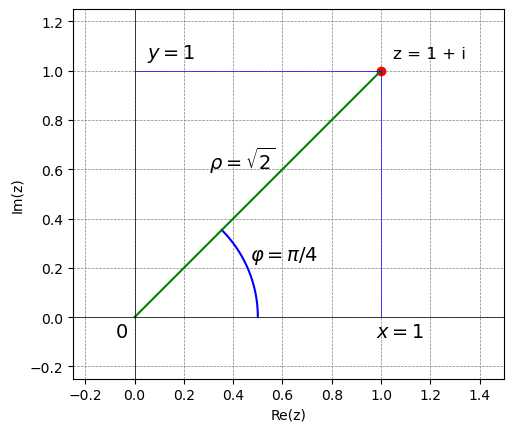

Рисунок 1 - Комплексное число z = 1 + i


In [48]:
# Импортируем из библиотеки matplolib, предназначенной для визуализации данных,
# модуль pyplot для построения графиков.
# Импортируем библиотеку numpy, предназначенную для работы с многомерными массивами.

import matplotlib.pyplot as plt
import numpy as np

# Задаем действительную и мнимую часть числа z = 1 + i
x = 1
y = 1

# Строим число z и надпись рядом
fig, ax = plt.subplots()
ax.plot(x, y, 'ro')
ax.text(1.05, 1.05, 'z = 1 + i', fontsize=12)

# Рисуем дугу от 0 до pi/4 радиуса 1/2 с центром в точке (0,0)
# и делаем напись рядом
radius = 1/2
center = (0, 0)
theta = np.linspace(0, np.pi/4, 100)
x1 = center[0] + radius * np.cos(theta)
y1 = center[1] + radius * np.sin(theta)
ax.plot(x1,y1,'b')
ax.text(0.47, 0.23, r'$\varphi=\pi/4$', fontsize=14)

# Рисуем отрезок, соединяющий точки 0 и z
# и делаем надписи рядом
ax.plot([0,x],[0,y],'g')
ax.text(0.3, 0.6, r'$\rho=\sqrt{2}$', fontsize=14)
ax.text(-0.08, -0.08, r'$0$', fontsize=14)

# Рисуем отрезок, соединяющий точки (x,0) и (x,y)
# и делаем надпись рядом
ax.plot([x,x],[0,y],'b', linewidth=0.5)
ax.text(0.98, -0.08, r'$x=1$', fontsize=14)

# Рисуем отрезок, соединяющий точки (0,y) и (x,y)
# и делаем надпись рядом
ax.plot([0,x],[y,y],'b', linewidth=0.5)
ax.text(0.05, 1.05, r'$y=1$', fontsize=14)

# Настройки графика
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-0.25, 1.5)
plt.ylim(-0.25, 1.25)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
ax.set_aspect('equal')
plt.show()

# Печатаем текст
print('Рисунок 1 - Комплексное число z = 1 + i')

**Упражнение 5.** Представить комплексное число $z = -1-i$ в тригонометрической форме. Сделать рисунок.

**Ответ**. $\displaystyle
z=\sqrt{2}\left(\cos\frac{5\pi}{4}+i\sin\frac{5\pi}{4}\right).$

**Покажем как получить этот ответ.**

In [49]:
from sympy import arg, Abs, I, pi

In [50]:
z = -1 - I

In [51]:
rho = Abs(z); rho

sqrt(2)

In [52]:
phi = arg(z); phi

-3*pi/4

In [53]:
phi = phi + 2*pi; phi

5*pi/4

Таким образом, тригонометрическое представление числа ${z=-1-i}$ будет $$\displaystyle
z=\sqrt{2}\left(\cos\frac{5\pi}{4}+i\sin\frac{5\pi}{4}\right).$$

**Замечание**. Аргумент числа ${z=-1-i}$ в sympy равен ${-3\pi}/{4}$, потому что в этой библиотеке аргументы комплексных чисел лежат в интервале $(-\pi,\pi]$. В рамках нашего курса мы договорились, что аргументы положительные и принадлежат $[0,2\pi)$. Поэтому к отрицательным значениям аргумента, вычисленным в sympy, надо добавлять величину $2\pi$.

**Упражнение 5.** Представить комплексное число $z = -1-i$ в тригонометрической форме. Сделать рисунок.

**Сделайте здесь рисунок к этому упражнению.**

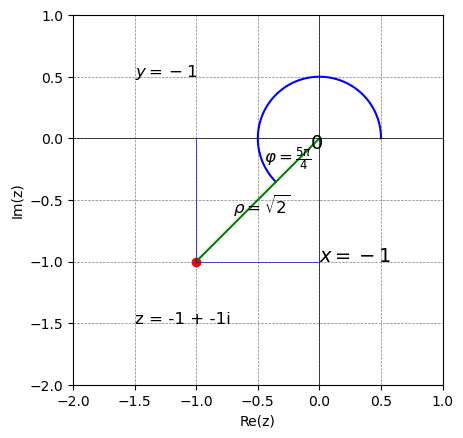

Рисунок - Комплексное число z = -1 - i


In [95]:
x = -1
y = -1
fig, ax = plt.subplots()
ax.plot(x, y, 'ro') #красный кружок
ax.text(-1.5, -1.5, f'z = {x} + {y}i', fontsize=12)

radius = 1/2
center = (0, 0)
theta = np.linspace(0, 5*np.pi/4, 100)
x1 = center[0] + radius * np.cos(theta)
y1 = center[1] + radius * np.sin(theta)
ax.plot(x1, y1, 'b')
ax.text(-0.45, -0.2, r'$\varphi = \frac{5\pi}{4}$', fontsize=12)

# Рисуем отрезок, соединяющий точки 0 и z
# и делаем надписи рядом
ax.plot([0, x], [0, y], 'g')
ax.text(-0.7, -0.6, r'$\rho = \sqrt{2}$', fontsize=12)
ax.text(-0.08, -0.08, r'$0$', fontsize=14)

ax.plot([x, x], [0, y], 'b', linewidth=0.5)
ax.text(0, -1, r'$x=-1$', fontsize=14)

ax.plot([0, x], [y, y], 'b', linewidth=0.5)
ax.text(-1.5, 0.5, r'$y=-1$', fontsize=12)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-2, 1)
plt.ylim(-2, 1)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
ax.set_aspect('equal')
plt.show()

print('Рисунок - Комплексное число z = -1 - i')

**Упражнение 6.** Представить в тригонометрической форме следующее число, на рисунке показать, где оно находится на комплексной плоскости: $a)$ $i$

**Ответ** $a)$ $\displaystyle \cos\frac{\pi}{2}+i\sin\frac{\pi}{2}$

**Напишите код и сделайте рисунок здесь.**

In [96]:
z = I

rho = Abs(z)
rho

1

In [97]:
phi = arg(z)
phi

pi/2

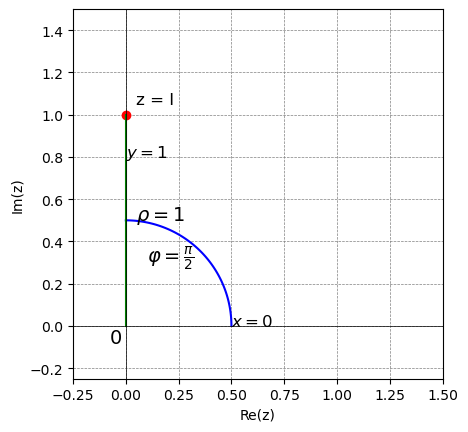

Рисунок - Комплексное число z = i


In [99]:
fig, ax = plt.subplots()
ax.plot(0, 1, 'ro') 
ax.text(0.05, 1.05, f'z = {z}', fontsize=12)

radius = 1/2
center = (0, 0)
theta = np.linspace(0, np.pi/2, 100)

x1 = center[0] + radius * np.cos(theta)
y1 = center[1] + radius * np.sin(theta)
ax.plot(x1, y1, 'b')
ax.text(0.1, 0.3, r'$\varphi = \frac{\pi}{2}$', fontsize=14)

ax.plot([0, 0], [0, 1], 'g')
ax.text(0.05, 0.5, r'$\rho = 1$', fontsize=14)
ax.text(-0.08, -0.08, r'$0$', fontsize=14)

ax.plot([x, x], [0, y], 'b', linewidth=0.5) #прозрачнее линия
ax.text(0.5, 0, r'$x=0$', fontsize=12)

ax.plot([0, x], [y, y], 'b', linewidth=0.5)
ax.text(0, 0.8, r'$y=1$', fontsize=12)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-0.25, 1.5)
plt.ylim(-0.25, 1.5)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
ax.set_aspect('equal')
plt.show()

print('Рисунок - Комплексное число z = i')


**Упражнение 6.** Представить в тригонометрической форме следующее число, на рисунке показать, где оно находится на комплексной плоскости: $b)$ $-1$

**Ответ** $b)$ $\cos \pi+i\sin \pi$

**Напишите код и сделайте рисунок здесь.**

In [100]:
z = -1

rho = Abs(z)
rho

1

In [101]:
phi = arg(z)
phi

pi

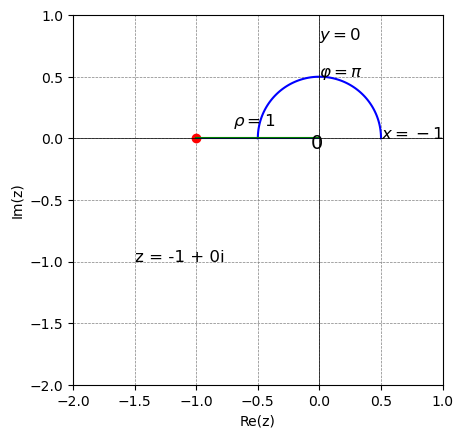

Рисунок - Комплексное число z = -1


In [103]:
x = -1
y = 0
fig, ax = plt.subplots()
ax.plot(x, y, 'ro')
ax.text(-1.5, -1, f'z = {x} + {y}i', fontsize=12)

radius = 1/2
center = (0, 0)
theta = np.linspace(0, np.pi, 100)
x1 = center[0] + radius * np.cos(theta)
y1 = center[1] + radius * np.sin(theta)
ax.plot(x1, y1, 'b')
ax.text(0, 0.5, r'$\varphi = \pi$', fontsize=12)

ax.plot([0, x], [0, y], 'g')
ax.text(-0.7, 0.1, r'$\rho = 1$', fontsize=12)
ax.text(-0.08, -0.08, r'$0$', fontsize=14)

ax.plot([x, x], [0, y], 'b', linewidth=0.5)
ax.text(0.5, 0, r'$x=-1$', fontsize=12)

ax.plot([0, x], [y, y], 'b', linewidth=0.5)
ax.text(0, 0.8, r'$y=0$', fontsize=12)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-2, 1)
plt.ylim(-2, 1)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
ax.set_aspect('equal')
plt.show()

print('Рисунок - Комплексное число z = -1')

**Упражнение 6.** Представить в тригонометрической форме следующее число, на рисунке показать, где оно находится на комплексной плоскости: $c)$ $-i$

**Ответ** $c)$ $\displaystyle \cos\frac{3\pi}{2}+i\sin\frac{3\pi}{2}$

In [104]:
z = -I

rho = Abs(z)
rho

1

In [105]:
phi = arg(z)
phi

-pi/2

In [106]:
phi = phi + 2*pi
phi

3*pi/2

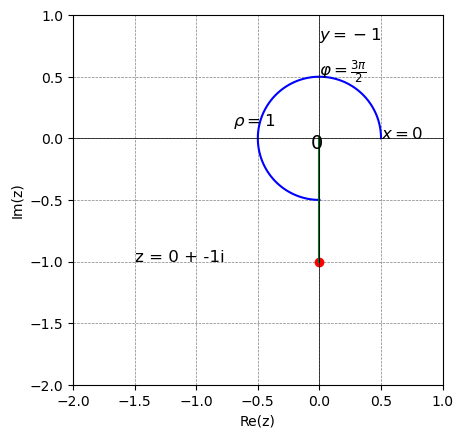

Рисунок - Комплексное число z = - i


In [107]:
x = 0
y = -1
fig, ax = plt.subplots()
ax.plot(x, y, 'ro')
ax.text(-1.5, -1, f'z = {x} + {y}i', fontsize=12)

radius = 1/2
center = (0, 0)
theta = np.linspace(0, 3*np.pi/2, 100) 
x1 = center[0] + radius * np.cos(theta)
y1 = center[1] + radius * np.sin(theta)
ax.plot(x1, y1, 'b')
ax.text(0, 0.5, r'$\varphi = \frac{3\pi}{2}$', fontsize=12)

ax.plot([0, x], [0, y], 'g')
ax.text(-0.7, 0.1, r'$\rho = 1$', fontsize=12)
ax.text(-0.08, -0.08, r'$0$', fontsize=14)

ax.plot([x, x], [0, y], 'b', linewidth=0.5)
ax.text(0.5, 0, r'$x=0$', fontsize=12)

ax.plot([0, x], [y, y], 'b', linewidth=0.5)
ax.text(0, 0.8, r'$y=-1$', fontsize=12)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-2, 1)
plt.ylim(-2, 1)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
ax.set_aspect('equal')
plt.show()

print('Рисунок - Комплексное число z = - i')


**Напишите код и сделайте рисунок здесь.**

**Упражнение 6.** Представить в тригонометрической форме следующее число, на рисунке показать, где оно находится на комплексной плоскости: $d)$ $-1+i$

**Ответ** $d)$ $\displaystyle \sqrt{2}\left(\cos\frac{3\pi}{4}+i\sin\frac{3\pi}{4}\right)$

In [108]:
z = -1 + I

rho = Abs(z)
rho

sqrt(2)

In [109]:
phi = arg(z)
phi

3*pi/4

**Напишите код и сделайте рисунок здесь.**

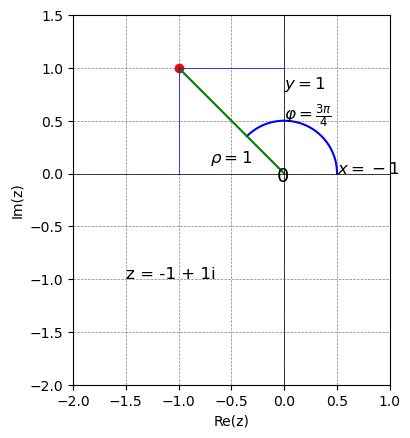

Рисунок - Комплексное число z = -1 + i


In [110]:
x = -1
y = 1
fig, ax = plt.subplots()
ax.plot(x, y, 'ro') 
ax.text(-1.5, -1, f'z = {x} + {y}i', fontsize=12)

radius = 1/2
center = (0, 0)
theta = np.linspace(0, 3*np.pi/4, 100)  
x1 = center[0] + radius * np.cos(theta)
y1 = center[1] + radius * np.sin(theta)
ax.plot(x1, y1, 'b')
ax.text(0, 0.5, r'$\varphi = \frac{3\pi}{4}$', fontsize=12)

ax.plot([0, x], [0, y], 'g')
ax.text(-0.7, 0.1, r'$\rho = 1$', fontsize=12)
ax.text(-0.08, -0.08, r'$0$', fontsize=14)

ax.plot([x, x], [0, y], 'b', linewidth=0.5)
ax.text(0.5, 0, r'$x=-1$', fontsize=12)

ax.plot([0, x], [y, y], 'b', linewidth=0.5)
ax.text(0, 0.8, r'$y=1$', fontsize=12)

# Настройки графика
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-2, 1)
plt.ylim(-2, 1.5)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
ax.set_aspect('equal')
plt.show()

# Печатаем текст
print('Рисунок - Комплексное число z = -1 + i')


**Упражнение 6.** Представить в тригонометрической форме следующее число, на рисунке показать, где оно находится на комплексной плоскости: $e)$ $1-i$

**Ответ** $e)$ $\displaystyle \sqrt{2}\left(\cos\frac{7\pi}{4}+i\sin\frac{7\pi}{4}\right)$

**Напишите код и сделайте рисунок здесь.**

In [111]:
z = 1 - I

rho = Abs(z)
rho

sqrt(2)

In [112]:
phi = arg(z)
phi = phi + 2*pi
phi

7*pi/4

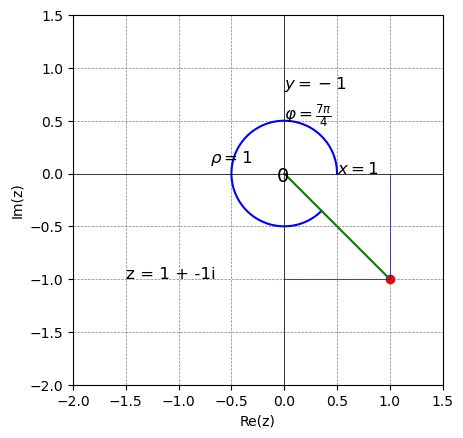

Рисунок - Комплексное число z = 1 - i


In [113]:
x = 1
y = -1
fig, ax = plt.subplots()
ax.plot(x, y, 'ro') 
ax.text(-1.5, -1, f'z = {x} + {y}i', fontsize=12)

radius = 1/2
center = (0, 0)
theta = np.linspace(0, 7*np.pi/4, 100)  
x1 = center[0] + radius * np.cos(theta)
y1 = center[1] + radius * np.sin(theta)
ax.plot(x1, y1, 'b')
ax.text(0, 0.5, r'$\varphi = \frac{7\pi}{4}$', fontsize=12)


ax.plot([0, x], [0, y], 'g')
ax.text(-0.7, 0.1, r'$\rho = 1$', fontsize=12)
ax.text(-0.08, -0.08, r'$0$', fontsize=14)

ax.plot([x, x], [0, y], 'b', linewidth=0.5)
ax.text(0.5, 0, r'$x=1$', fontsize=12)

ax.plot([0, x], [y, y], 'b', linewidth=0.5)
ax.text(0, 0.8, r'$y=-1$', fontsize=12)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-2, 1.5)
plt.ylim(-2, 1.5)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
ax.set_aspect('equal')
plt.show()

print('Рисунок - Комплексное число z = 1 - i')

**Упражнение 6.** Представить в тригонометрической форме следующее число, на рисунке показать, где оно находится на комплексной плоскости: $f)$ $-1+i\sqrt{3}$

**Ответ** $f)$ $\displaystyle 2\left(\cos\frac{2\pi}{3}+i\sin\frac{2\pi}{3}\right)$

**Напишите код и сделайте рисунок здесь.**

In [114]:
z = -1 + I*3**0.5

rho = Abs(z)
rho

2.00000000000000

In [115]:
phi = arg(z)
phi 

-1.0471975511966 + pi

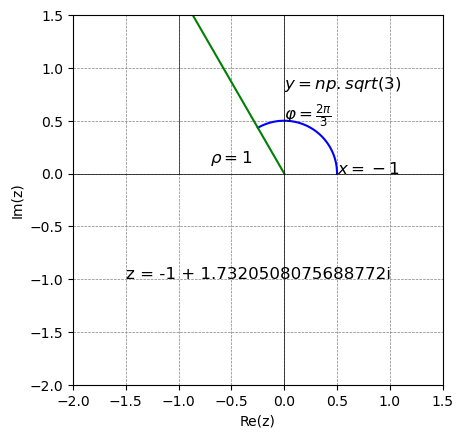

Рисунок - Комплексное число z = -1 + 3^2*i


In [118]:
x = -1
y = np.sqrt(3)

fig, ax = plt.subplots()
ax.plot(x, y, 'ro')  
ax.text(-1.5, -1, f'z = {x} + {y}i', fontsize=12)

radius = 1/2
center = (0, 0)
theta = np.linspace(0, 2*np.pi/3, 100)  
x1 = center[0] + radius * np.cos(theta)
y1 = center[1] + radius * np.sin(theta)

ax.plot(x1, y1, 'b')
ax.text(0, 0.5, r'$\varphi = \frac{2\pi}{3}$', fontsize=12)

ax.plot([0, x], [0, y], 'g')
ax.text(-0.7, 0.1, r'$\rho = 1$', fontsize=12)

ax.plot([x, x], [0, y], 'b', linewidth=0.5)
ax.text(0.5, 0, r'$x=-1$', fontsize=12)

ax.plot([0, x], [y, y], 'b', linewidth=0.5)
ax.text(0, 0.8, r'$y=np.sqrt(3)$', fontsize=12)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-2, 1.5)
plt.ylim(-2, 1.5)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
ax.set_aspect('equal')
plt.show()

print('Рисунок - Комплексное число z = -1 + 3^2*i')

**Упражнение 6.** Представить в тригонометрической форме следующее число, на рисунке показать, где оно находится на комплексной плоскости: $g)$ $-1-i\sqrt{3}$

**Ответ** $g)$ $\displaystyle 2\left(\cos\frac{4\pi}{3}+i\sin\frac{4\pi}{3}\right)$

**Напишите код и сделайте рисунок здесь.**

In [119]:
z = -1 - I*3**0.5

rho = Abs(z)
rho

2.00000000000000

In [120]:
phi = arg(z)
phi

1.0471975511966 - pi

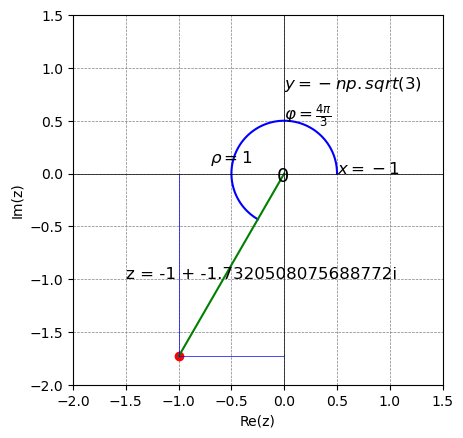

Рисунок - Комплексное число z = -1 - 3^0.5i


In [121]:
x = -1
y = -np.sqrt(3)

fig, ax = plt.subplots()
ax.plot(x, y, 'ro')  
ax.text(-1.5, -1, f'z = {x} + {y}i', fontsize=12)

radius = 1/2
center = (0, 0)
theta = np.linspace(0, 4*np.pi/3, 100)  
x1 = center[0] + radius * np.cos(theta)
y1 = center[1] + radius * np.sin(theta)
ax.plot(x1, y1, 'b')
ax.text(0, 0.5, r'$\varphi = \frac{4\pi}{3}$', fontsize=12)

ax.plot([0, x], [0, y], 'g')
ax.text(-0.7, 0.1, r'$\rho = 1$', fontsize=12)
ax.text(-0.08, -0.08, r'$0$', fontsize=14)

ax.plot([x, x], [0, y], 'b', linewidth=0.5)
ax.text(0.5, 0, r'$x=-1$', fontsize=12)

ax.plot([0, x], [y, y], 'b', linewidth=0.5)
ax.text(0, 0.8, r'$y=-np.sqrt(3)$', fontsize=12)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-2, 1.5)
plt.ylim(-2, 1.5)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
ax.set_aspect('equal')
plt.show()

print('Рисунок - Комплексное число z = -1 - 3^0.5i')


**Упражнение 6.** Представить в тригонометрической форме следующее число, на рисунке показать, где оно находится на комплексной плоскости: $h)$ $1+i\sqrt{3}$


**Ответ** $h)$ $\displaystyle 2\left(\cos\frac{\pi}{3}+i\sin\frac{\pi}{3}\right)$

**Напишите код и сделайте рисунок здесь.**

In [122]:
z = 1 + I*3**0.5

rho = Abs(z)
rho

2.00000000000000

In [123]:
phi = arg(z)
phi

1.04719755119660

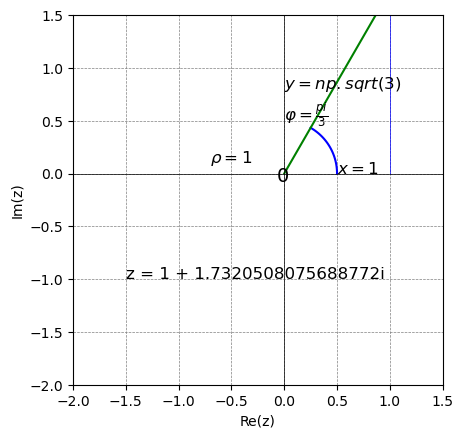

Рисунок - Комплексное число z = 1 + 3^0.5i


In [124]:
x = 1
y = np.sqrt(3)

fig, ax = plt.subplots()
ax.plot(x, y, 'ro') 
ax.text(-1.5, -1, f'z = {x} + {y}i', fontsize=12)

radius = 1/2
center = (0, 0)
theta = np.linspace(0, np.pi/3, 100)  
x1 = center[0] + radius * np.cos(theta)
y1 = center[1] + radius * np.sin(theta)
ax.plot(x1, y1, 'b')
ax.text(0, 0.5, r'$\varphi = \frac{pi}{3}$', fontsize=12)

ax.plot([0, x], [0, y], 'g')
ax.text(-0.7, 0.1, r'$\rho = 1$', fontsize=12)
ax.text(-0.08, -0.08, r'$0$', fontsize=14)

ax.plot([x, x], [0, y], 'b', linewidth=0.5)
ax.text(0.5, 0, r'$x=1$', fontsize=12)

ax.plot([0, x], [y, y], 'b', linewidth=0.5)
ax.text(0, 0.8, r'$y=np.sqrt(3)$', fontsize=12)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-2, 1.5)
plt.ylim(-2, 1.5)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
ax.set_aspect('equal')
plt.show()

print('Рисунок - Комплексное число z = 1 + 3^0.5i')

**Упражнение 7.** Описать множество точек, изображающих числа $z$, удовлетворяющих следующему неравенству, сделать рисунок на комплексной плоскости: $a)$ $|z|<2$.

**Ответ** $a)$ Внутренность круга радиуса $2$ с центром в начале координат.


**Покажем, как сделать рисунок к упражнению 7 a)**

Импортируем из библиотеки matplolib, предназначенной для визуализации данных, модуль pyplot для построения графиков. Импортируем библиотеку numpy, предназначенную для работы с многомерными массивами.

In [125]:
import matplotlib.pyplot as plt
import numpy as np

Множеством точек, удовлетворяющих неравенству $|z|<2$, является внутренность круга радиуса $2$ с центром в точке ноль.
Нарисуем этот круг. Зададим параметры круга.

In [126]:
radius = 2
center = (0, 0)

Создадим массивы данных для построения круга.

In [127]:
theta = np.linspace(0, 2*np.pi, 100)
x = center[0] + radius * np.cos(theta)
y = center[1] + radius * np.sin(theta)

Построим окружность, для этого испольуем команду plot. Затем закрасим область внутри круга - команда fill.

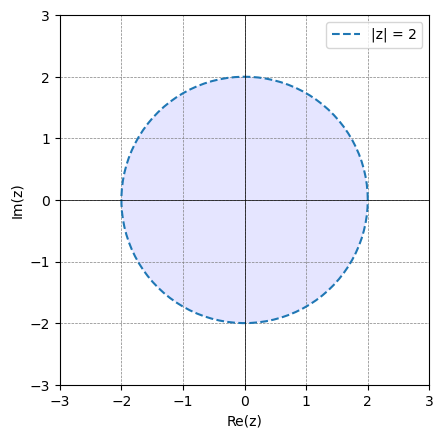

Рисунок 2 - Множество точек z, удовлетворяющее неравенству |z|<2


In [128]:
fig, ax = plt.subplots()
ax.plot(x, y, label='|z| = 2', linestyle='--') # Рисуем окружность штриховой линией
ax.fill(x, y, 'b', alpha=0.1)  # Закрашиваем область внутри круга
ax.set_aspect('equal') # Зададим равным соотношение между делениями осей

# Настройки графика
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.legend()
plt.show()

print('Рисунок 2 - Множество точек z, удовлетворяющее неравенству |z|<2')

**Упражнение 7.** Описать множество точек, изображающих числа $z$, удовлетворяющих следующему неравенству, сделать рисунок на комплексной плоскости: $b)$ $|z-i|\leq 1$

**Ответ** $b)$ внутренность и граница круга радиуса $1$ с центром в точке $(0,1)$.

**Напишите решение с кодом и рисунком здесь.**

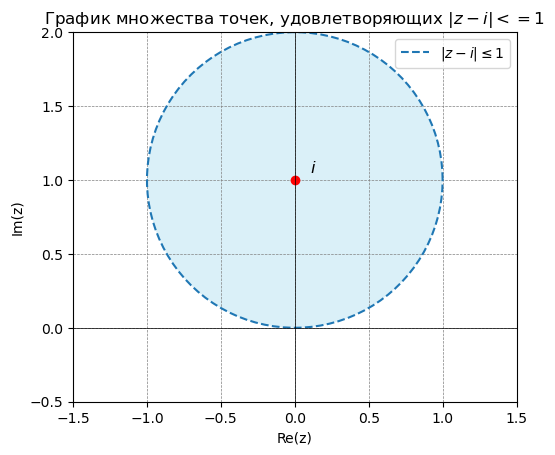

Рисунок - Множество точек z, удовлетворяющее неравенству $|z - i| <= 1$


In [130]:
center = (0, 1)
radius = 1

# Создание массива углов для рисования круга
theta = np.linspace(0, 2 * np.pi, 100)

# Координаты точек на окружности
x = center[0] + radius * np.cos(theta)
y = center[1] + radius * np.sin(theta)

# Построение графика
fig, ax = plt.subplots()

# Рисуем круг штриховой линией и заполняем его
ax.plot(x, y, label=r'$|z - i| \leq 1$', linestyle='--')
ax.fill(x, y, 'skyblue', alpha=0.3)

ax.plot(0, 1, 'ro')  # точка i
ax.text(0.1, 1.05, r'$i$', fontsize=12)

ax.set_aspect('equal')  # Задаем равное соотношение между делениями осей
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-0.5, 2)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.legend()

plt.title(r'График множества точек, удовлетворяющих $|z - i| <= 1$')

plt.show()

print('Рисунок - Множество точек z, удовлетворяющее неравенству $|z - i| <= 1$')

**Упражнение 7.** Описать множество точек, изображающих числа $z$, удовлетворяющих следующему неравенству, сделать рисунок на комплексной плоскости: $c)$ $|z-1-i|<1$.

**Ответ** $c)$ внутренность круга радиуса 1 с центром в точке $(1,1)$.


**Напишите решение с кодом и рисунком здесь.**

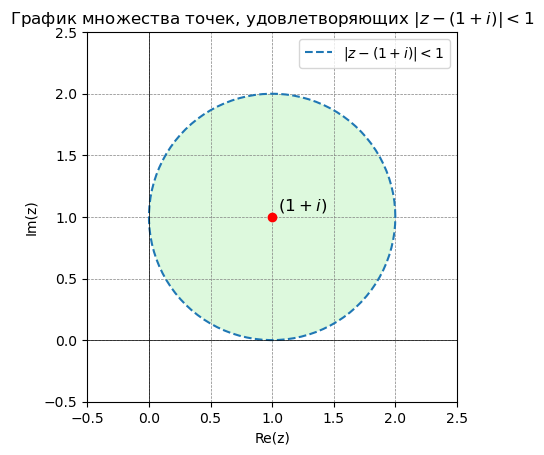

Рисунок - Множество точек z, удовлетворяющее неравенству $|z - (1 + i)| < 1$


In [131]:
center = (1, 1)
radius = 1

theta = np.linspace(0, 2 * np.pi, 100)

x = center[0] + radius * np.cos(theta)
y = center[1] + radius * np.sin(theta)

fig, ax = plt.subplots()
ax.plot(x, y, label=r'$|z - (1 + i)| < 1$', linestyle='--')
ax.fill(x, y, 'lightgreen', alpha=0.3)

ax.plot(1, 1, 'ro')  # Точка (1, 1)
ax.text(1.05, 1.05, r'$(1 + i)$', fontsize=12)
ax.set_aspect('equal')  # Задаем равное соотношение между делениями осей

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.legend()

plt.title(r'График множества точек, удовлетворяющих $|z - (1 + i)| < 1$')

plt.show()

print('Рисунок - Множество точек z, удовлетворяющее неравенству $|z - (1 + i)| < 1$')

**Упражнение 8.** Найти $\min|2i-z|$, считая $|z|\le 1$, и точку $z_m$, в которой этот минимум достигается.


**Решение.** Сделаем рисунок. Изобразим множество точек $z$ на плоскости, удовлетворяющих  условию $|z|\le1$. Это единичный круг с центром в начале координат вместе со своей границей. Нам нужно найти точку, принадлежащую этому множеству, расположенную ближе всего к точке $2i$, и расстояние от найденной точки до $2i$. Ясно, что это точка $i$ а расстояние от нее до $2i$ равно 1.

**Ответ.** $\displaystyle \min\limits_{|z|\le1}|2i-z|=1$. Минимум достигается в точке $z_m=i$.


**Напишите код и сделайте рисунок здесь.**

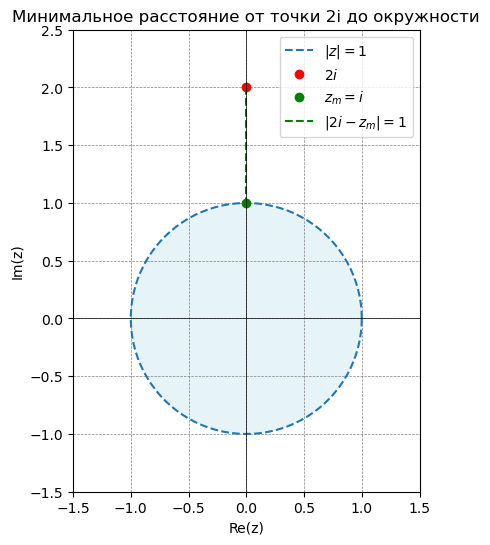

Рисунок - Множество точек z, удовлетворяющее неравенству |z| ≤ 1, и минимальное расстояние от точки 2i до окружности.


In [132]:
import numpy as np
import matplotlib.pyplot as plt

center = (0, 0)
radius = 1
theta = np.linspace(0, 2 * np.pi, 100)

x = center[0] + radius * np.cos(theta)
y = center[1] + radius * np.sin(theta)

# Точка 2i на комплексной плоскости
point = (0, 2)  # Точка 2i

# Точка, где достигается минимум (i)
z_m = (0, 1)  # Точка i

fig, ax = plt.subplots(figsize=(6, 6))

# Рисуем единичный круг
ax.plot(x, y, label=r'$|z| = 1$', linestyle='--')
ax.fill(x, y, 'lightblue', alpha=0.3)  

# Рисуем точку 2i
ax.plot(point[0], point[1], 'ro', label=r'$2i$')

# Рисуем точку, где минимум достигается (i)
ax.plot(z_m[0], z_m[1], 'go', label=r'$z_m = i$')

# Рисуем отрезок между точками 2i и i
ax.plot([point[0], z_m[0]], [point[1], z_m[1]], 'g--', label=r'$|2i - z_m| = 1$')

ax.set_aspect('equal')  
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 2.5)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.legend()

plt.title('Минимальное расстояние от точки 2i до окружности')

plt.show()

# Печатаем результат
print('Рисунок - Множество точек z, удовлетворяющее неравенству |z| ≤ 1, и минимальное расстояние от точки 2i до окружности.')

**Упражнение 9.**  Вычислить $(1+i)^{25}$.

**Ответ**. $(1+i)^{25}=2^{12}+2^{12}i$.

**Покажем, как получить этот ответ.**

In [133]:
from sympy import re, im, I

In [134]:
z = (1+I)**25; z

(1 + I)**25

In [135]:
re(z)+im(z)*I

4096 + 4096*I

Упростим ответ.

In [136]:
2**12

4096

Следовательно, полученное нами решение совпадает с ответом: $(1+i)^{25}=2^{12}+2^{12}i$.

**Упражнение 9.**  Вычислить $(1+i)^{25}$.

**Ответ**. $(1+i)^{25}=2^{12}+2^{12}i$.

**Сделайте рисунок к упражнению 9 здесь.**

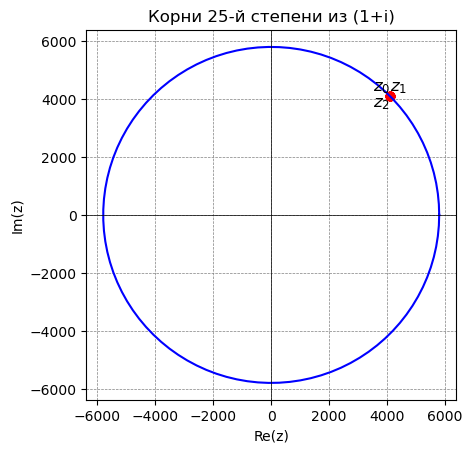

График - Корни 25-й степени из (1+i)


In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Определяем количество корней, модуль и аргумент числа (1 + i)
n = 25
rho = np.sqrt(2)
phi = np.pi / 4

# Вычисляем корни
roots = [pow(rho, n) *
             (np.cos(n * (phi + 2 * np.pi * k) / n) +
              1j * np.sin(n * (phi + 2 * np.pi * k) / n))
         for k in range(n)]

# Извлекаем действительные и мнимые части из корней
x = [root.real for root in roots]
y = [root.imag for root in roots]

# Строим корни
fig, ax = plt.subplots()
ax.plot(x, y, 'ro')
ax.set_aspect('equal')

# Подписи для нескольких корней
ax.text(x[0], y[0], r'$z_0$', fontsize=12, verticalalignment='bottom', horizontalalignment='right') # Выравнивание по низу и по правому краю
ax.text(x[1], y[1], r'$z_1$', fontsize=12, verticalalignment='bottom', horizontalalignment='left')
ax.text(x[2], y[2], r'$z_2$', fontsize=12, verticalalignment='top', horizontalalignment='right')

# Рисуем окружность радиуса pow(rho, n) с центром в точке (0,0)
radius = pow(rho, n)
center = (0, 0)
theta = np.linspace(0, 2 * np.pi, 100)
x1 = center[0] + radius * np.cos(theta)
y1 = center[1] + radius * np.sin(theta)
ax.plot(x1, y1, 'b')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-radius * 1.1, radius * 1.1)
plt.ylim(-radius * 1.1, radius * 1.1)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Корни 25-й степени из (1+i)')
plt.show()

print('График - Корни 25-й степени из (1+i)')

**Упражнение 10.** Вычислить $\sqrt[3]{i}$ и сделать рисунок.

**Ответ.** $-i$, $-\sqrt 3/2 + i/2$, $\sqrt3/2 + i/2$.

**Покажем, как получить этот ответ.**

 Импортируем класс  solve, предназначенный для решения уравнений с комплексными выражениями, и мнимую единицу.

In [141]:
from sympy import solve, I

Импортируем комплексный символ $z$.

In [142]:
from sympy.abc import z

Определим выражение $z^3-i$.

In [143]:
expression = z**3 - I; expression

z**3 - I

Найдем все корни уравнения $z^3-i = 0$.

In [144]:
roots = solve(expression, z); roots

[-I, -sqrt(3)/2 + I/2, sqrt(3)/2 + I/2]

Получили вектор, содержащий три символьных выражения. Запишем отдельно каждое из них. Тут надо иметь в виду, что в Python элементы векторов нумеруются, начиная с нуля.

In [145]:
roots[0]

-I

In [146]:
roots[1]

-sqrt(3)/2 + I/2

In [147]:
roots[2]

sqrt(3)/2 + I/2

**Упражнение 10.** Вычислить $\sqrt[3]{i}$ и сделать рисунок.

**Покжем как сделать рисунок к этому упражнению.**

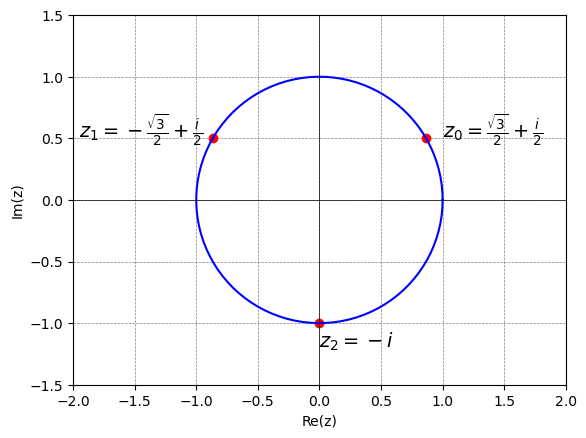

Рисунок 3 - Корни третьей степени из мнимой единицы


In [148]:
# Импортируем из библиотеки matplolib, предназначенной для визуализации данных,
# модуль pyplot для построения графиков.
# Импортируем библиотеку numpy, предназначенную для работы с многомерными массивами.

import matplotlib.pyplot as plt
import numpy as np

# Определяем количество корней, модуль и аргумент числа i
n = 3
rho = 1 #Abs
phi = np.pi/2

# Вычисляем корни
# Мнимая единица в numpy обозначается 1j
# pow(rho, (1/n)) вычисляет корень степени n из числа rho
roots = [pow(rho, (1/n))*
             (np.cos((phi + 2*np.pi*k)/n) +
         1j * np.sin((phi + 2*np.pi*k)/n))
         for k in range(n)]

# Извлекаем действительные и мнимые части из корней
x = [root.real for root in roots]
y = [root.imag for root in roots]

# Строим корни
fig, ax = plt.subplots()
ax.plot(x, y, 'ro')
ax.set_aspect('equal')

# Делаем надписи
ax.text(1,0.5,r'$z_0=\frac{\sqrt{3}}{2}+\frac{i}{2}$', fontsize=14)
ax.text(-1.95,0.5,r'$z_1=-\frac{\sqrt{3}}{2}+\frac{i}{2}$', fontsize=14)
ax.text(0,-1.2,r'$z_2=-i$', fontsize=14)

# Рисуем окружность радиуса корень степени n из числа rho с центром в точке (0,0)
radius = pow(rho, (1/n))
center = (0, 0)
theta = np.linspace(0, 2*np.pi, 100)
x1 = center[0] + radius * np.cos(theta)
y1 = center[1] + radius * np.sin(theta)
ax.plot(x1,y1,'b')

# Настройки графика
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-2, 2)
plt.ylim(-1.5, 1.5)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.show()

print('Рисунок 3 - Корни третьей степени из мнимой единицы')

**Упражнение 11.** Вычислить $(1 + i)^6$. Сделать рисунок.

**Ответ.** $-2^3i$.

**Напишите код и сделайте рисунок здесь.**

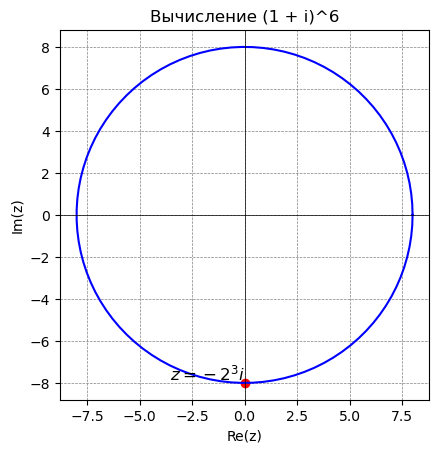

Результат: (-1.4695761589768243e-15-8.000000000000004j)


In [149]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import pprint

n = 6
rho = np.sqrt(2)
phi = np.pi / 4

# Вычисляем (1 + i)^6
result_rho = pow(rho, n)
result_phi = n * phi

# Записываем результат в алгебраической форме
result = result_rho * (np.cos(result_phi) + 1j * np.sin(result_phi))

# Вычисляем координаты результата
x = [result.real]
y = [result.imag]

# Строим точку результата
fig, ax = plt.subplots()
ax.plot(x, y, 'ro')
ax.set_aspect('equal')

# Подписываем результат
ax.text(x[0], y[0], r'$z = -2^3i$', fontsize=12, verticalalignment='bottom', horizontalalignment='right')

# Рисуем окружность радиуса pow(rho, n) с центром в точке (0,0)
radius = pow(rho, n)
center = (0, 0)
theta = np.linspace(0, 2 * np.pi, 100)
x1 = center[0] + radius * np.cos(theta)
y1 = center[1] + radius * np.sin(theta)
ax.plot(x1, y1, 'b')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-radius * 1.1, radius * 1.1)
plt.ylim(-radius * 1.1, radius * 1.1)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Вычисление (1 + i)^6')
plt.show()

print(f'Результат: {result}')

**Упражнение 12.** Извлечь корни и сделать рисунок: $a)$ $\sqrt[4]{-1}$

**Ответ** $a)$ $(1+i)/\sqrt{2}$, $(1-i)/\sqrt{2}$, $(-1+i)/\sqrt{2}$,
$(-1-i)/\sqrt{2}$

**Напишите код и сделайте рисунок здесь.**

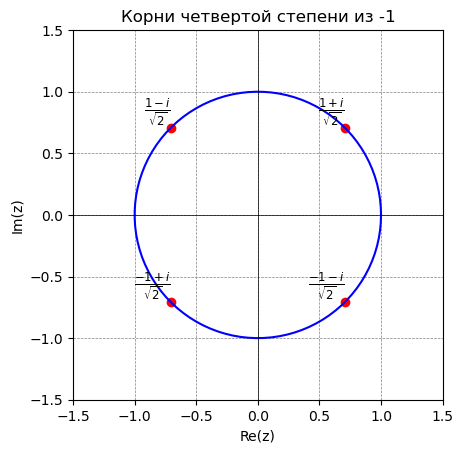

Корни четвертой степени из -1:
[0.707106781186548 + 0.707106781186547⋅ⅈ, -0.707106781186547 + 0.7071067811865
48⋅ⅈ, -0.707106781186548 - 0.707106781186547⋅ⅈ, 0.707106781186547 - 0.70710678
1186548⋅ⅈ]


In [150]:
n = 4
rho = 1
phi = np.pi

# Вычисляем корни
roots = [pow(rho, 1/n) * (np.cos((phi + 2 * np.pi * k) / n) + I * np.sin((phi + 2 * np.pi * k) / n)) for k in range(n)]

# Извлекаем действительные и мнимые части
x = [root.as_real_imag()[0] for root in roots]
y = [root.as_real_imag()[1] for root in roots]

fig, ax = plt.subplots()
ax.plot(x, y, 'ro')
ax.set_aspect('equal')

labels = [r'$\frac{1+i}{\sqrt{2}}$', r'$\frac{1-i}{\sqrt{2}}$', r'$\frac{-1+i}{\sqrt{2}}$', r'$\frac{-1-i}{\sqrt{2}}$']
for i in range(n):
    ax.text(x[i], y[i], labels[i], fontsize=12, verticalalignment='bottom', horizontalalignment='right')

radius = 1
theta = np.linspace(0, 2 * np.pi, 100)
x1 = radius * np.cos(theta)
y1 = radius * np.sin(theta)
ax.plot(x1, y1, 'b')

# Настройки графика
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Корни четвертой степени из -1')
plt.show()

# Выводим результат в символьной форме
print('Корни четвертой степени из -1:')
pprint(roots)

**Упражнение 12.** Извлечь корни и сделать рисунок: $b)$  $\sqrt[3]{1}$

**Ответ** $b)$  $1$, $\displaystyle -\frac{1}{2}\pm i\frac{\sqrt{3}}{2}$

**Напишите код и сделайте рисунок здесь.**

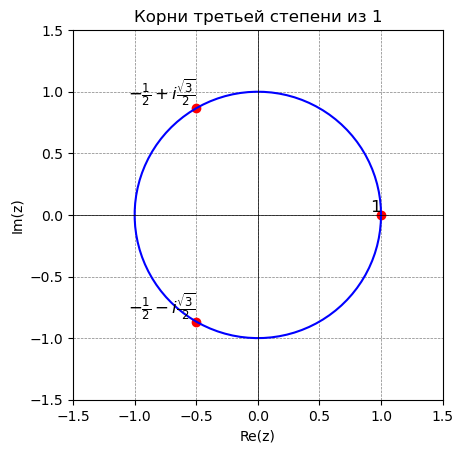

Корни третьей степени из 1:
[1.0, -0.5 + 0.866025403784439⋅ⅈ, -0.5 - 0.866025403784438⋅ⅈ]


In [151]:
n = 3
rho = 1
phi = 0

roots = [pow(rho, 1/n) * (np.cos((phi + 2 * np.pi * k) / n) + I * np.sin((phi + 2 * np.pi * k) / n)) for k in range(n)]

x = [root.as_real_imag()[0] for root in roots]
y = [root.as_real_imag()[1] for root in roots]

fig, ax = plt.subplots()
ax.plot(x, y, 'ro')
ax.set_aspect('equal')

labels = [r'$1$', r'$-\frac{1}{2} + i\frac{\sqrt{3}}{2}$', r'$-\frac{1}{2} - i\frac{\sqrt{3}}{2}$']
for i in range(n):
    ax.text(x[i], y[i], labels[i], fontsize=12, verticalalignment='bottom', horizontalalignment='right')

radius = 1
theta = np.linspace(0, 2 * np.pi, 100)
x1 = radius * np.cos(theta)
y1 = radius * np.sin(theta)
ax.plot(x1, y1, 'b')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Корни третьей степени из 1')
plt.show()

print('Корни третьей степени из 1:')
pprint(roots)



**Упражнение 13.** Вычислить выражение $\displaystyle\left(\frac{1+i\sqrt{3}}{1-i}\right)^{20}$. Сделать рисунок.


**Ответ.** $2^9(1-i \sqrt{3})$.


**Напишите код и сделайте рисунок здесь.**

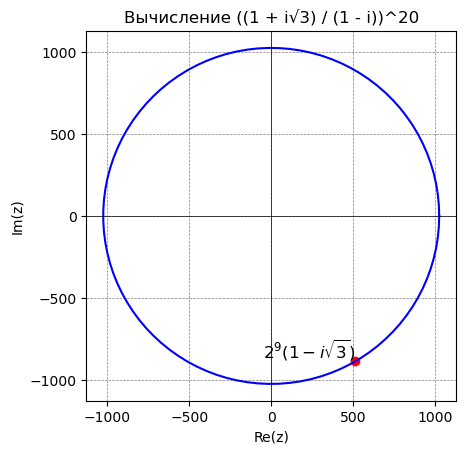

Результат:
        ⎛       ⎛1 + √3⎞⎞             ⎛       ⎛1 + √3⎞⎞
1024⋅cos⎜20⋅atan⎜──────⎟⎟ + 1024⋅ⅈ⋅sin⎜20⋅atan⎜──────⎟⎟
        ⎝       ⎝1 - √3⎠⎠             ⎝       ⎝1 - √3⎠⎠


In [154]:
from sympy import I, sqrt, pprint, Abs, arg, cos, sin

z = (1 + I * sqrt(3)) / (1 - I)

rho = Abs(z)
phi = arg(z)

n = 20
result_rho = rho**n
result_phi = n * phi

result = result_rho * (cos(result_phi) + I * sin(result_phi))

x = [result.as_real_imag()[0]]
y = [result.as_real_imag()[1]]

fig, ax = plt.subplots()
ax.plot(x, y, 'ro')
ax.set_aspect('equal')

ax.text(x[0], y[0], r'$2^9(1 - i\sqrt{3})$', fontsize=12, verticalalignment='bottom', horizontalalignment='right')

radius = float(result_rho)
theta = np.linspace(0, 2 * np.pi, 100)
x1 = radius * np.cos(theta)
y1 = radius * np.sin(theta)
ax.plot(x1, y1, 'b')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-radius * 1.1, radius * 1.1)
plt.ylim(-radius * 1.1, radius * 1.1)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Вычисление ((1 + i√3) / (1 - i))^20')
plt.show()

print('Результат:')
pprint(result)

**Упражнение 14.** Вычислить $\left({1}/{2} - i{\sqrt{3}}/{2}\right)^5$. Сделать рисунок.


**Ответ.** ${1}/{2} + i{\sqrt{3}}/{2}$.



**Напишите код и сделайте рисунок здесь.**

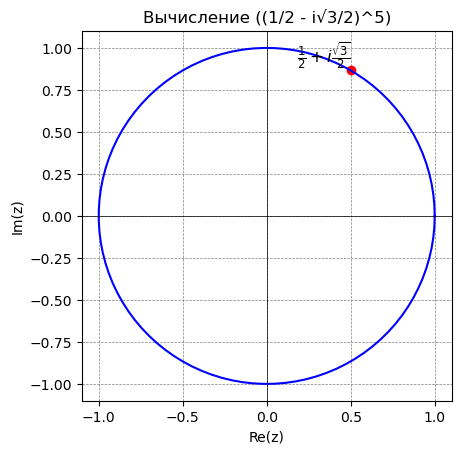

Результат:
1.0⋅cos(5⋅atan(1.0⋅√3)) - ⅈ⋅sin(5⋅atan(1.0⋅√3))


In [156]:
z = (1/2 - I * sqrt(3)/2)

rho = Abs(z)
phi = arg(z)

n = 5
result_rho = rho**n
result_phi = n * phi

result = result_rho * (cos(result_phi) + I * sin(result_phi))

x = [result.as_real_imag()[0]]
y = [result.as_real_imag()[1]]

fig, ax = plt.subplots()
ax.plot(x, y, 'ro')
ax.set_aspect('equal')

ax.text(x[0], y[0], r'$\frac{1}{2} + i\frac{\sqrt{3}}{2}$', fontsize=12, verticalalignment='bottom', horizontalalignment='right')

radius = float(result_rho)
theta = np.linspace(0, 2 * np.pi, 100)
x1 = radius * np.cos(theta)
y1 = radius * np.sin(theta)
ax.plot(x1, y1, 'b')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-radius * 1.1, radius * 1.1)
plt.ylim(-radius * 1.1, radius * 1.1)
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.title('Вычисление ((1/2 - i√3/2)^5)')
plt.show()

print('Результат:')
pprint(result)